In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from IPython.display import display


ds = load_dataset("ailsntua/QEvasion")

train_df = ds["train"].to_pandas()
test_df = ds["test"].to_pandas()

train_df = train_df.dropna(subset=["clarity_label", "evasion_label"])
test_df = test_df.dropna(subset=["clarity_label", "evasion_label"])

for df in (train_df, test_df):
    df["q_len"] = df["question"].astype(str).str.split().str.len()
    df["a_len"] = df["interview_answer"].astype(str).str.split().str.len()

display(train_df.head())

,title,date,president,url,question_order,interview_question,interview_answer,gpt3.5_summary,gpt3.5_prediction,question,...,annotator2,annotator3,inaudible,multiple_questions,affirmative_questions,index,clarity_label,evasion_label,q_len,a_len
0,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,How would you respond to the accusation that t...,...,None,None,False,False,False,0,Clear Reply,Explicit,19,359
1,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,Do you think President Xi is being sincere abo...,...,None,None,False,False,False,1,Ambivalent,General,21,359
2,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Do you believe the country's slowdown and gro...,...,None,None,False,False,False,2,Ambivalent,Partial/half-answer,25,219
3,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Are you worried about the meeting between Pre...,...,None,None,False,False,False,3,Ambivalent,Dodging,26,219
4,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,3,"Q. I can imagine. It is evening, I'd like to r...","Well, I hope I get to see Mr. Xi sooner than l...",The question consists of 3 parts:\n1. Is the P...,Question part: 1. Is the President's engagemen...,Is the President's engagement with Asian coun...,...,None,None,False,False,False,4,Clear Reply,Explicit,14,444


**Clarity Visualization**

In [ ]:
clarity_counts = train_df["clarity_label"].value_counts()
display(clarity_counts)

,count
clarity_label,
Ambivalent,2040
Clear Reply,1052
Clear Non-Reply,356


In [ ]:
clarity_percent = train_df["clarity_label"].value_counts(normalize=True) * 100
display(clarity_percent.to_frame("percent"))

,percent
clarity_label,
Ambivalent,59.164733
Clear Reply,30.510441
Clear Non-Reply,10.324826


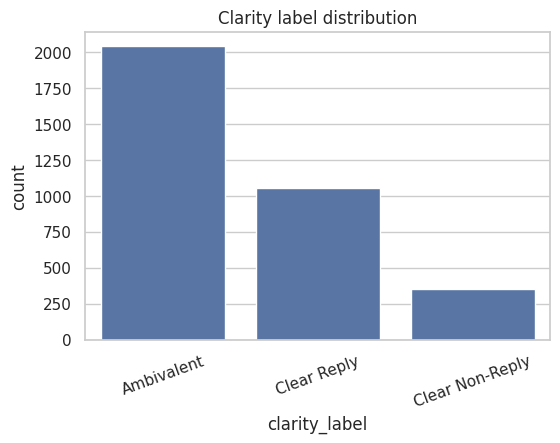

In [ ]:
plt.figure(figsize=(6, 4))
order = train_df["clarity_label"].value_counts().index
sns.countplot(data=train_df, x="clarity_label", order=order)
plt.title("Clarity label distribution")
plt.xticks(rotation=20)
plt.show()

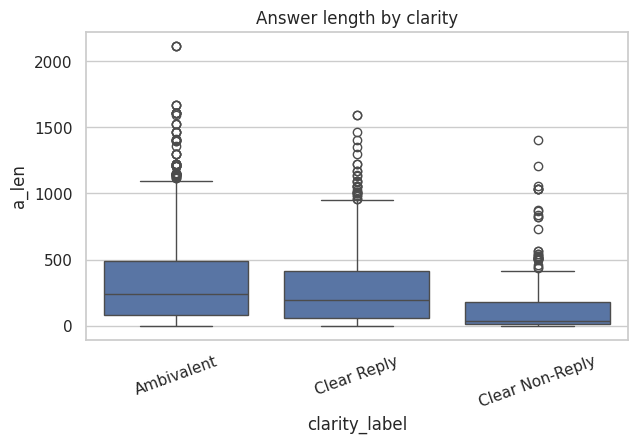

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=train_df, x="clarity_label", y="a_len",
            order=train_df["clarity_label"].value_counts().index)
plt.title("Answer length by clarity")
plt.xticks(rotation=20)
plt.show()


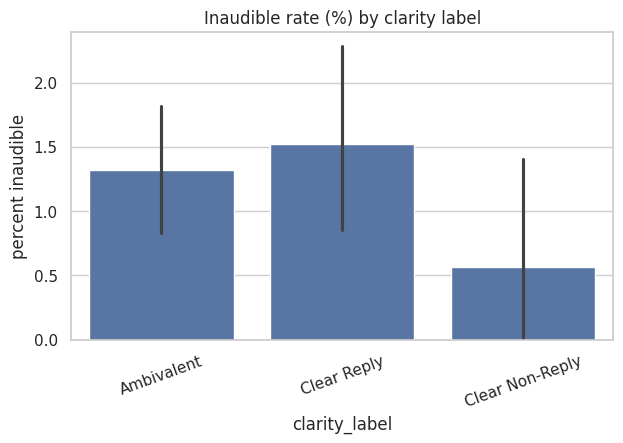

In [ ]:
plt.figure(figsize=(7, 4))
sns.barplot(
    data=train_df,
    x="clarity_label",
    y="inaudible",
    estimator=lambda x: x.mean() * 100,
    order=train_df["clarity_label"].value_counts().index
)
plt.title("Inaudible rate (%) by clarity label")
plt.ylabel("percent inaudible")
plt.xticks(rotation=20)
plt.show()

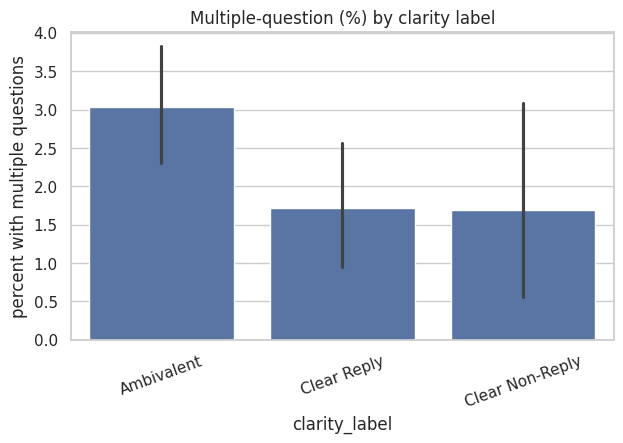

In [ ]:
plt.figure(figsize=(7, 4))
sns.barplot(
    data=train_df,
    x="clarity_label",
    y="multiple_questions",
    estimator=lambda x: x.mean() * 100,
    order=train_df["clarity_label"].value_counts().index
)
plt.title("Multiple-question (%) by clarity label")
plt.ylabel("percent with multiple questions")
plt.xticks(rotation=20)
plt.show()

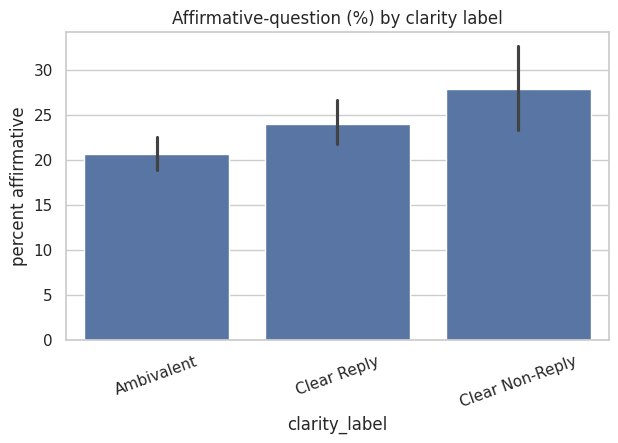

In [ ]:
plt.figure(figsize=(7, 4))
sns.barplot(
    data=train_df,
    x="clarity_label",
    y="affirmative_questions",
    estimator=lambda x: x.mean() * 100,
    order=train_df["clarity_label"].value_counts().index
)
plt.title("Affirmative-question (%) by clarity label")
plt.ylabel("percent affirmative")
plt.xticks(rotation=20)
plt.show()


**Evasion** **Visualization**

In [ ]:
evasion_counts = train_df["evasion_label"].value_counts()
display(evasion_counts)

,count
evasion_label,
Explicit,1052
Dodging,706
Implicit,488
General,386
Deflection,381
Declining to answer,145
Claims ignorance,119
Clarification,92
Partial/half-answer,79


In [ ]:
evasion_percent = train_df["evasion_label"].value_counts(normalize=True) * 100
display(evasion_percent.to_frame("percent"))

,percent
evasion_label,
Explicit,30.510441
Dodging,20.475638
Implicit,14.153132
General,11.194896
Deflection,11.049884
Declining to answer,4.205336
Claims ignorance,3.451276
Clarification,2.668213
Partial/half-answer,2.291183


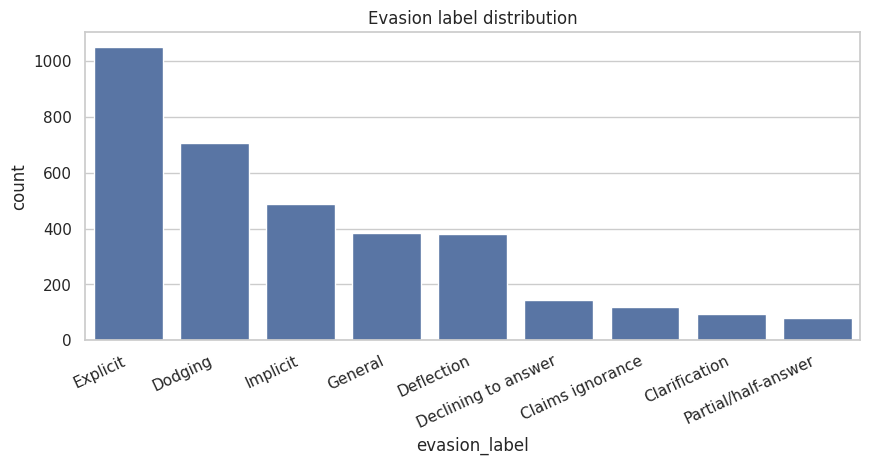

In [ ]:
plt.figure(figsize=(10, 4))
order = train_df["evasion_label"].value_counts().index
sns.countplot(data=train_df, x="evasion_label", order=order)
plt.title("Evasion label distribution")
plt.xticks(rotation=25, ha="right")
plt.show()

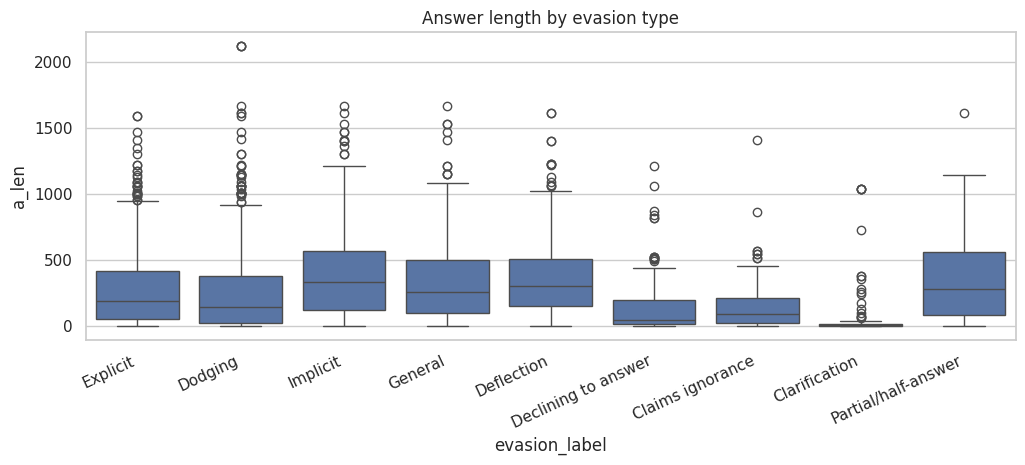

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=train_df, x="evasion_label", y="a_len",
            order=train_df["evasion_label"].value_counts().index)
plt.title("Answer length by evasion type")
plt.xticks(rotation=25, ha="right")
plt.show()

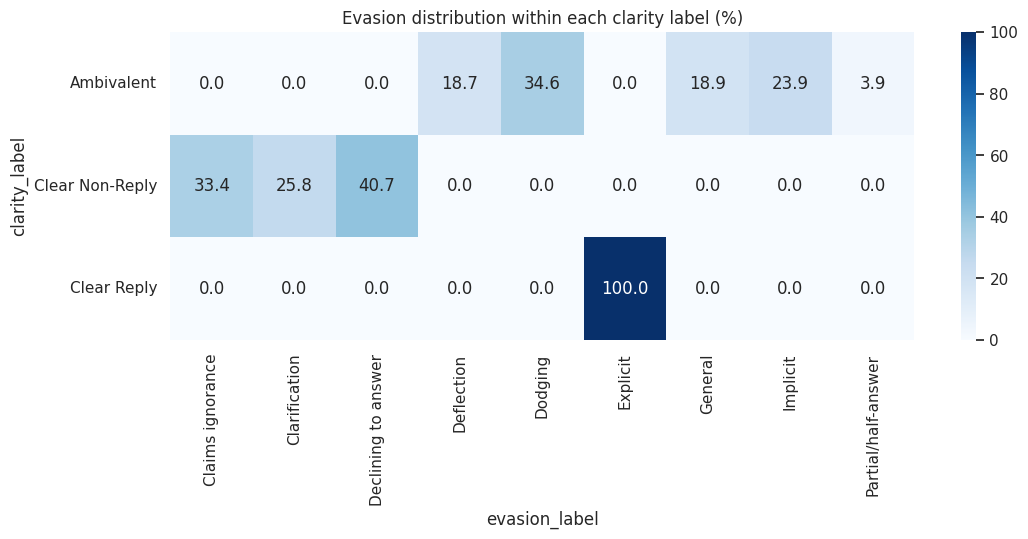

In [ ]:
ctab = pd.crosstab(
    train_df["clarity_label"],
    train_df["evasion_label"],
    normalize="index"
) * 100

plt.figure(figsize=(12, 4))
sns.heatmap(ctab, annot=True, fmt=".1f", cmap="Blues")
plt.title("Evasion distribution within each clarity label (%)")
plt.show()

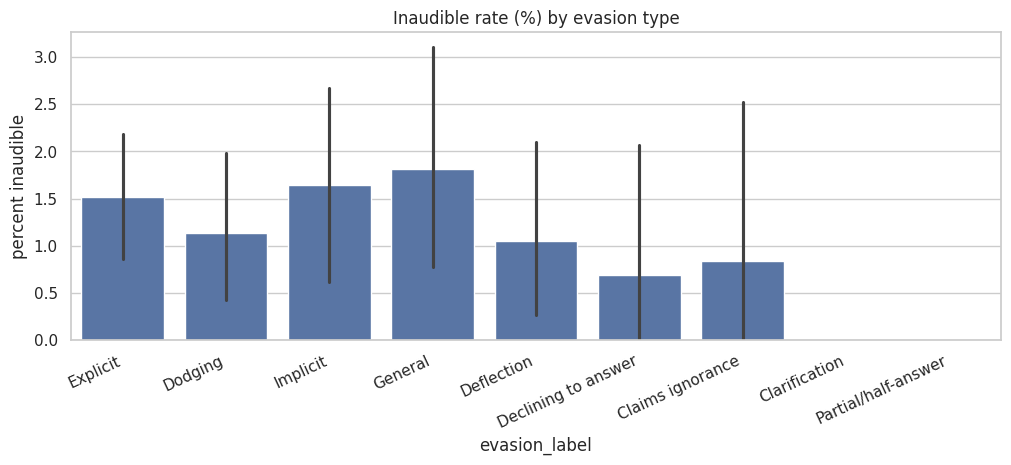

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(
    data=train_df,
    x="evasion_label",
    y="inaudible",
    estimator=lambda x: x.mean() * 100,
    order=train_df["evasion_label"].value_counts().index
)
plt.title("Inaudible rate (%) by evasion type")
plt.ylabel("percent inaudible")
plt.xticks(rotation=25, ha="right")
plt.show()

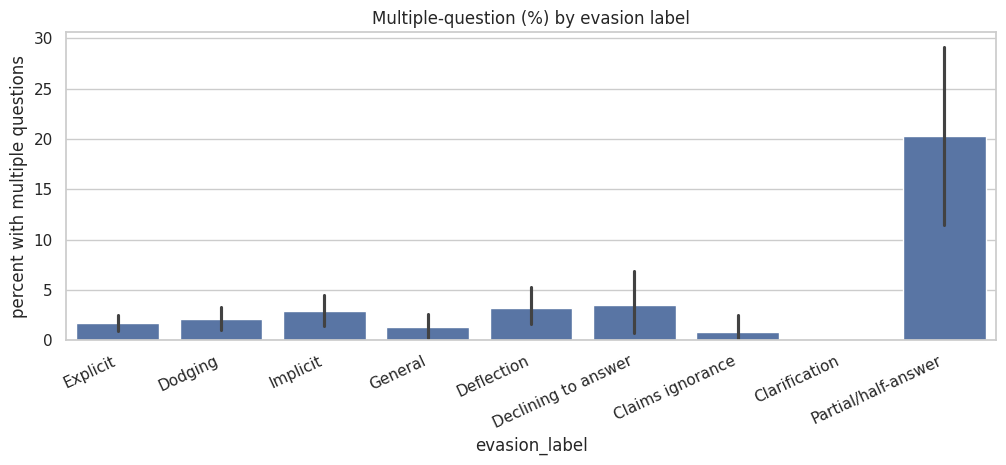

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(
    data=train_df,
    x="evasion_label",
    y="multiple_questions",
    estimator=lambda x: x.mean() * 100,
    order=train_df["evasion_label"].value_counts().index
)
plt.title("Multiple-question (%) by evasion label")
plt.ylabel("percent with multiple questions")
plt.xticks(rotation=25, ha="right")
plt.show()

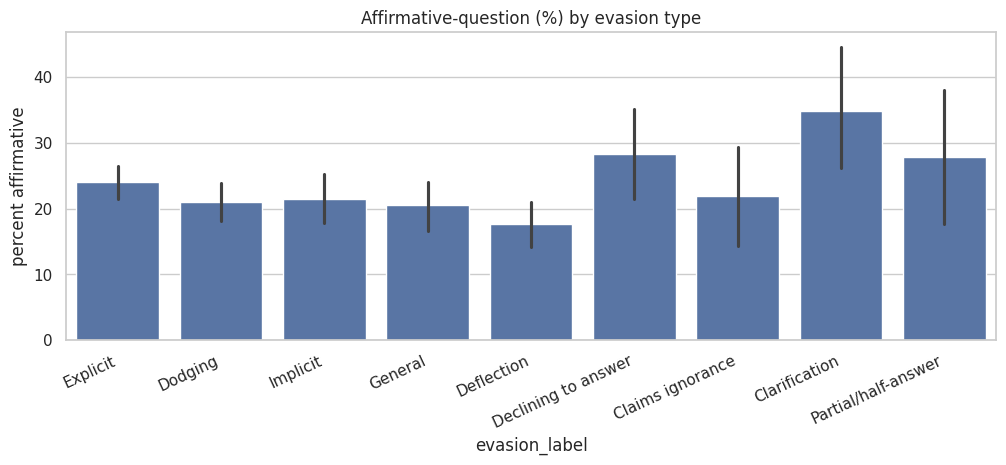

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(
    data=train_df,
    x="evasion_label",
    y="affirmative_questions",
    estimator=lambda x: x.mean() * 100,
    order=train_df["evasion_label"].value_counts().index
)
plt.title("Affirmative-question (%) by evasion type")
plt.ylabel("percent affirmative")
plt.xticks(rotation=25, ha="right")
plt.show()
